# Case Studies
## Function Definitions

In [23]:
from typing import List
import numpy as np


def ellipsoid(x: List[float], alpha: int = 1000) -> float:
    d = len(x)
    return sum([np.power(alpha, (i - 1) / (d - 1)) * np.exp2(x[i]) for i in range(d)])
    

def rosenbrock_banana(x1: float, x2: float) -> float:
    return np.exp2(1 - x1) + 100 * np.exp2(x2 - np.power(x1, 2))


def log_ellipsoid(x: List[float], epsilon: float = 1e-4) -> float:
    return np.log(epsilon + ellipsoid(x))


def attractive_sector(x: List[float], q: float = 1e4) -> float:
    d = len(x)
    h = lambda x : np.log(1 + np.exp(q * x)) / q
    return sum([np.exp2(h(x[i])) + 100 * np.exp2(h(x[i])) for i in range(d)])


def sum_of_different_powers_function(x: List[float]) -> float:
    d = len(x)
    return sum([np.power(np.exp2(x[i]), 1 + (i - 1) / (d - 1)) for i in range(d)])

In [24]:
log_ellipsoid([1, 1, 1])

## Symbolic Computation

In [1]:
import sympy

In [9]:
x, y, z = sympy.symbols('x y z')
sympy.init_printing(use_unicode=True)

expr = sympy.exp(x * y * z)
sympy.diff(sympy.diff(expr, x), x)

In [12]:
x, y, z = sympy.symbols('x y z')
sympy.init_printing(use_unicode=True)

expr = sympy.exp(x * y * z)
deriv = sympy.Derivative(expr, x, y, y, z, 4)
print(deriv)

Derivative(exp(x*y*z), x, (y, 2), (z, 4))


In [11]:
deriv.doit()

In [19]:
print(expr)
expr.subs({x: 3, y: 4})

exp(x*y*z)


In [31]:
from sympy import Function, hessian, pprint
from sympy.abc import x, y
f = Function('f')(x, y)
g1 = Function('g')(x, y)
g2 = x ** 2 + 3 * y
pprint(hessian(g2, (x, y)))

⎡2  0⎤
⎢    ⎥
⎣0  0⎦


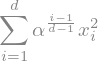

In [75]:
from sympy import Sum
from sympy.functions import exp

i, j, d, alpha = sympy.symbols('i j d alpha')
x = sympy.IndexedBase('x')
expr = Sum(alpha ** ((i - 1) / (d - 1)) * x[i] ** 2, (i, 1, d))
expr

In [93]:
expr.subs({d: 9, alpha: 1000}).doit().subs([(x[i], i ** 2)  for i in range(10)]).evalf()

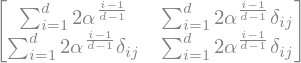

In [77]:
hessian(expr, (x[i], x[j]))

In [ ]:
def sym_ellipsoid(x: List[float], alpha: int = 1000) -> float:
    d = len(x)
    return sum([np.power(alpha, (i - 1) / (d - 1)) * np.exp2(x[i]) for i in range(d)])

In [84]:
import numpy
A = sympy.IndexedBase('A')
i = sympy.Symbol('i', integer=True)
N = sympy.Symbol('N', integer=True)

S = sympy.Sum(A[i], (i, 0, N))
Trace = sympy.Sum(A[i, i], (i, 0, N))

S.subs([(A, range(3)), (N, 2)]).doit()  # python3 range
# result: 3

S.subs([(A, [8, 16, 32]), (N, 2)]).doit()
# result: A[0] + A[1] + A[2]

S.subs([(A, numpy.arange(3)), (N, 2)]).doit()
# result: A[0] + A[1] + A[2]

Trace.subs([(A, numpy.diag([2, 4, 8])), (N, 2)]).doit()
# result: A[0, 0] + A[1, 1] + A[2, 2]

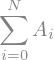

In [85]:
S

In [87]:
S.subs(N, 2).doit().subs([(A[i], i**2) for i in range(3)])   # 5

## Numeric Computation